In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#seaborn.set_theme(color_codes=True)

In [50]:
df = pd.read_csv('D:\Pizza\Pizza_v1.csv')
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no


## Data Pre-Procesing

In [15]:
#replace "Rp" and Comma from table price_rupiah
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','').str.replace(',','')

In [16]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,39000,8.5,tuna,spicy tuna,small,yes,yes
125,E,72000,12.0,tuna,spicy tuna,medium,yes,yes
126,E,99000,14.0,tuna,spicy tuna,large,yes,yes
127,E,44000,8.5,meat,BBQ_meat_fiesta,small,yes,no


In [17]:
#data Types

df.dtypes

company          object
price_rupiah     object
diameter        float64
topping          object
variant          object
size             object
extra_sauce      object
extra_cheese     object
dtype: object

In [18]:
#check the number of unique value on object datatype

df.select_dtypes(include='object').nunique()

company          5
price_rupiah    43
topping         12
variant         20
size             6
extra_sauce      2
extra_cheese     2
dtype: int64

In [26]:
#convert "price_rupiah" as object column to "int" and "Diameter" as float64 to "int"

df['price_rupiah'] = df['price_rupiah'].astype('int32', copy=True)
df['diameter'] = df['diameter'].astype('int32', copy=True)

In [27]:
#data Types

df.dtypes

company         object
price_rupiah     int32
diameter         int32
topping         object
variant         object
size            object
extra_sauce     object
extra_cheese    object
dtype: object

In [28]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22,chicken,double_signature,jumbo,yes,yes
1,A,198000,20,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14,smoked beef,double_signature,reguler,yes,no
4,A,248000,18,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,39000,8,tuna,spicy tuna,small,yes,yes
125,E,72000,12,tuna,spicy tuna,medium,yes,yes
126,E,99000,14,tuna,spicy tuna,large,yes,yes
127,E,44000,8,meat,BBQ_meat_fiesta,small,yes,no


In [29]:
#duplicated 

df.drop_duplicates()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22,chicken,double_signature,jumbo,yes,yes
1,A,198000,20,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14,smoked beef,double_signature,reguler,yes,no
4,A,248000,18,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,39000,8,tuna,spicy tuna,small,yes,yes
125,E,72000,12,tuna,spicy tuna,medium,yes,yes
126,E,99000,14,tuna,spicy tuna,large,yes,yes
127,E,44000,8,meat,BBQ_meat_fiesta,small,yes,no


In [51]:
#See Missing Data

for col in df.columns:
    nct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(nct_missing*100)))

company - 0%
price_rupiah - 0%
diameter - 0%
topping - 0%
variant - 0%
size - 0%
extra_sauce - 0%
extra_cheese - 0%


# Segment Pizza Variants

In [52]:
df.variant.unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [53]:
#define function to segment pizza

def pizza_variant(variant):
    if 'veggie' in variant:
        return 'Vegetarian'
    if 'meat' in variant or 'BBQ' in variant:
        return 'Meat'
    if 'tuna' in variant:
        return 'Seafood'
    else:
        return 'Other'
    
#apply Function to "Pizza Name" Column to Create new "Pizza Type" column

df['variant'] = df['variant'].apply(pizza_variant)

<AxesSubplot:>

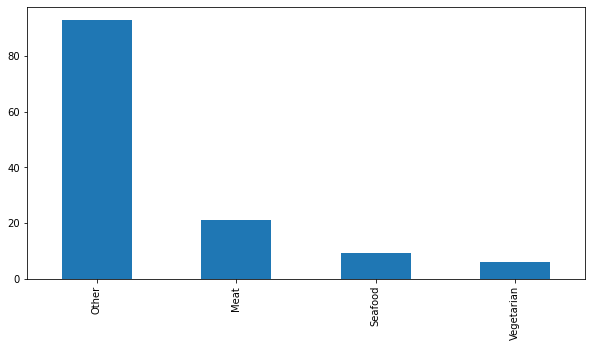

In [54]:
plt.figure(figsize=(10,5))
df['variant'].value_counts().plot(kind='bar')

ValueError: Neither the `x` nor `y` variable appears to be numeric.

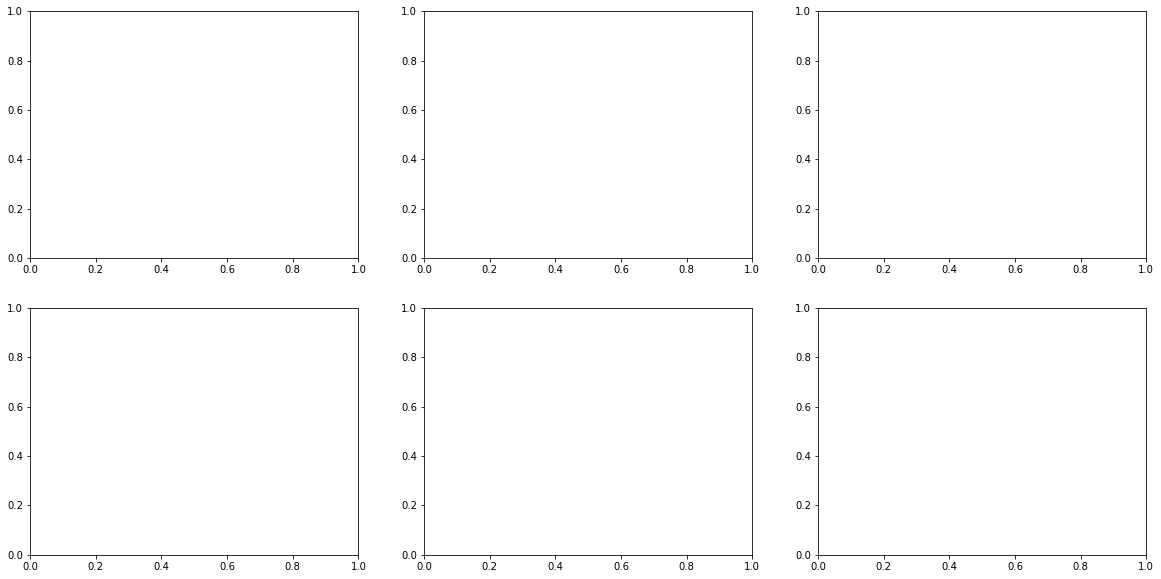

In [84]:
#list Category to Plot
cat_vars = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']

#test = pd.DataFrame(cat_vars , dtype=object)
             
#create figure with subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axs = axs.ravel()

#create bar plot for each category list
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_rupiah', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
#adjust spasing between subplots
fig.tight_layout()

#show plot
plt.show()

<AxesSubplot:xlabel='diameter'>

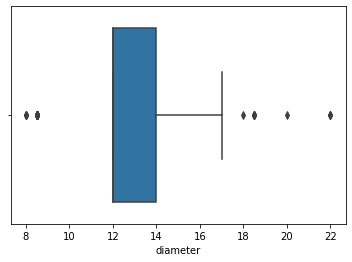

In [72]:
sns.boxplot(x='diameter', data=df)

<AxesSubplot:xlabel='variant', ylabel='diameter'>

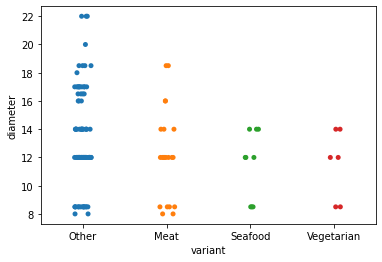

In [91]:
sns.stripplot(x="variant", y="diameter", data=df)